In [1]:
#This analysis was performed in order to find out what influences the rating of ramen.
#Tasks:
#1) Выяснить какая форма подачи является самой популярной
#2) Does country of production Affect Noodles Rankings
#3) Which brands of noodles are the most popular and have the best ratings
#4) Which brands makes the best instant noodles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
s = pd.read_csv('/Users/alexandrperetokin/Downloads/ramen.csv')#https://www.kaggle.com/residentmario/ramen-ratings

In [4]:
(s.loc[s['Stars'] == '0']).shape

(26, 7)

In [5]:
s.loc[s['Stars'] == 'Unrated'].shape#We have to delete string values

(3, 7)

In [7]:
s = s.drop([32,122,993])

In [8]:
s['Stars'] = s['Stars'].astype(float)


In [9]:
s.rename({'Review #': 'Review'}, axis=1, inplace=True)

In [10]:
ss = s.groupby(s['Style']).agg(['count', 'mean'])
del ss['Review','mean']
del ss['Stars','count']

In [11]:

ss = ss.loc[ss.Review['count'] > 6]#It is better to remove small samples

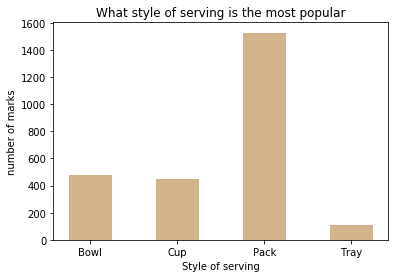

In [14]:


plt.bar(ss.index,ss.Review['count'], color ='tan',
        width = 0.5)
 
plt.xlabel("Style of serving")
plt.ylabel("number of marks")
plt.title("What style of serving is the most popular")
plt.show()

In [15]:
#Packaged noodles are the most common dishes

In [16]:
jj = s.groupby(["Country"]).agg(['mean','count'])

In [17]:
del jj['Review','mean']
del jj['Stars','count']

In [18]:
jj = jj.loc[jj.Review['count'] > 15]

In [19]:
jj.Review['count'].sort_values(ascending=False)

Country
Japan          352
USA            323
South Korea    307
Taiwan         224
Thailand       191
China          169
Malaysia       155
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
UK              69
Philippines     47
Canada          41
India           31
Germany         27
Mexico          25
Australia       22
Name: count, dtype: int64

In [20]:
jj.loc[['Japan','USA','South Korea','Taiwan']]

,Review,Stars
,count,mean
Country,,
Japan,352,3.981605
USA,323,3.457043
South Korea,307,3.790554
Taiwan,224,3.665402


In [21]:
kk = jj.loc[['Japan','USA','South Korea','Taiwan']]

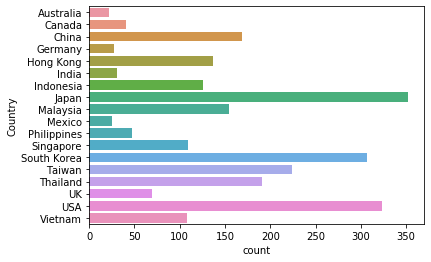

In [24]:
sns.barplot(data=jj, y=jj.index, x = jj.Review['count'])

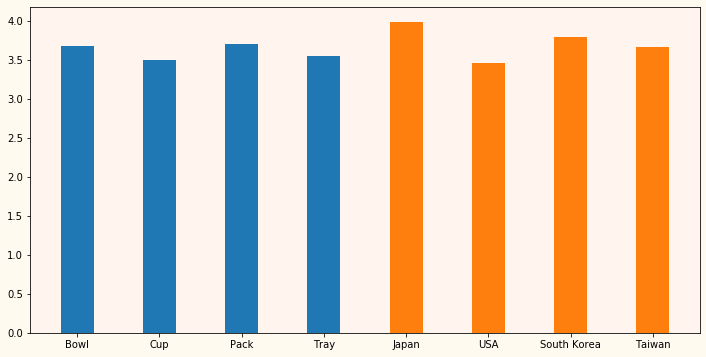

In [81]:


x1 = np.arange(1, 8) - 0.2
x2 = np.arange(1, 8) + 0.2
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(ss.index, ss.Stars['mean'], width = 0.4)
ax.bar(kk.index, kk.Stars['mean'], width = 0.4)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    
fig.set_figheight(6)    
fig.set_facecolor('floralwhite')

plt.show()

In [26]:
#this histogram perfect illustrates that noodle is perfect, and it's doesn't matter how they were served and where were they cooced

In [27]:
gg = s.groupby(["Brand"]).agg(['mean','count'])

In [28]:
del gg['Review','mean']


In [29]:
gg = gg.loc[gg['Review']['count'] > 20]

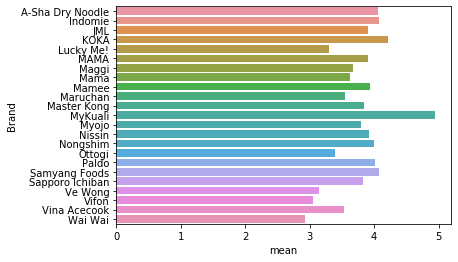

In [31]:
sns.barplot(data=gg, y = gg.index[:23], x = gg.Stars['mean'])

In [33]:
ad = s.loc[s['Style'] == 'Pack']

In [34]:
ad = ad.groupby(["Brand"]).agg(['mean','count'])


In [36]:
del ad['Review','mean']
del ad['Stars', 'count']


In [82]:
dd = ad.rank()

In [83]:
dd['sum'] = dd.Review['count']+dd.Stars['mean']
dd['sum'].sort_values(ascending=False)

Brand
Nongshim            106.5
Samyang Foods       104.5
Indomie              97.5
MyKuali              97.0
Nissin               95.0
Paldo                95.0
A-Sha Dry Noodle     92.0
Takamori Kosan       81.5
Vit's                80.0
Yamachan             78.5
Mama                 77.0
Myojo                76.5
Sapporo Ichiban      75.5
Master Kong          75.0
Deshome              75.0
Mamee                75.0
JML                  74.5
MAMA                 73.0
Maggi                72.0
KOKA                 71.0
Jingqi               67.0
Vina Acecook         67.0
Maruchan             65.0
Mi Sedaap            64.5
Koka                 64.0
Ottogi               64.0
SuperMi              64.0
Prima Taste          63.5
CarJEN               61.5
Sakurai Foods        61.5
Tseng Noodles        60.5
Amianda              57.5
Lucky Me!            57.0
Asian Thai Foods     55.5
Wu-Mu                55.0
Vifon                53.0
Wai Wai              49.0
Ve Wong              48.5
Ibumie

In [79]:

dd.loc[['Nongshim','Samyang Foods','Indomie','MyKuali','Nissin']]#ranks and their sum

,Review,Stars,sum
,count,mean,
Brand,,,
Nongshim,55.5,51.0,106.5
Samyang Foods,52.5,52.0,104.5
Indomie,55.5,42.0,97.5
MyKuali,40.0,57.0,97.0
Nissin,58.0,37.0,95.0


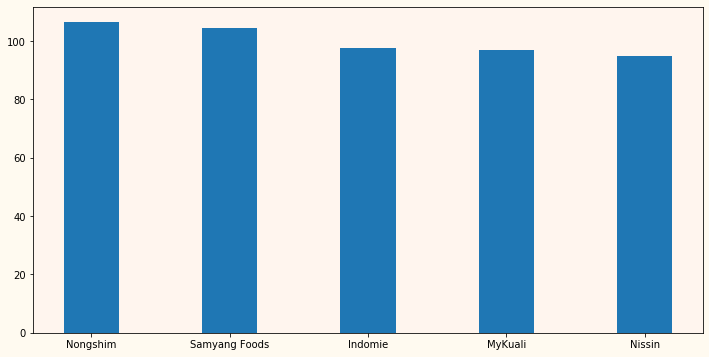

In [80]:

x1 = np.arange(1, 8) - 0.2

y1 = np.random.randint(1, 10, size = 7)


fig, ax = plt.subplots()

ax.bar(dd.loc[['Nongshim','Samyang Foods','Indomie','MyKuali','Nissin']].index
       , dd.loc[['Nongshim','Samyang Foods','Indomie','MyKuali','Nissin']]['sum'], width = 0.4)


ax.set_facecolor('seashell')
fig.set_figwidth(12)    
fig.set_figheight(6)    
fig.set_facecolor('floralwhite')

plt.show()

In [ ]:
#top 5 brands of Instant noodles, counted by sum of ranks